# Исследование объявлений о продаже квартир в Санкт-Петербурге и окрестностях

Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо проанализировать данные.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

План анализа данных:
    
    1) Изучить общую информацию о данных
    2) Проанализировать пропущенные значения, по возможности заполнить
    3) Убрать дубликаты
    4) Проанализировать редкие и выбивающиеся значения, по возможности убрать
    5) Добавить новые столбцы для удобства проведения анализа
    6) Провести исследовательский анализ данных:
        а) исследовать основные параметры объектов недвижимости
        б) проанализировать время продажи объектов недвижимости
        в) определить факторы, влияющие на стоимость объектов недвижимости
        г) проанализировать цену квадратного метра
        д) проанализировать цену единицы расстояния до центра города в Санкт-Петербурге
    7) Сделать общий вывод

### Изучение общей информации

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Посмотрим на общую информацию о данных:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датасете есть много пропущенных значений. Тип данных некоторых столбцов не соответствует содержимому.

Первые 10 строк датасета:

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим на частоту появления значений в числовых столбцах:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

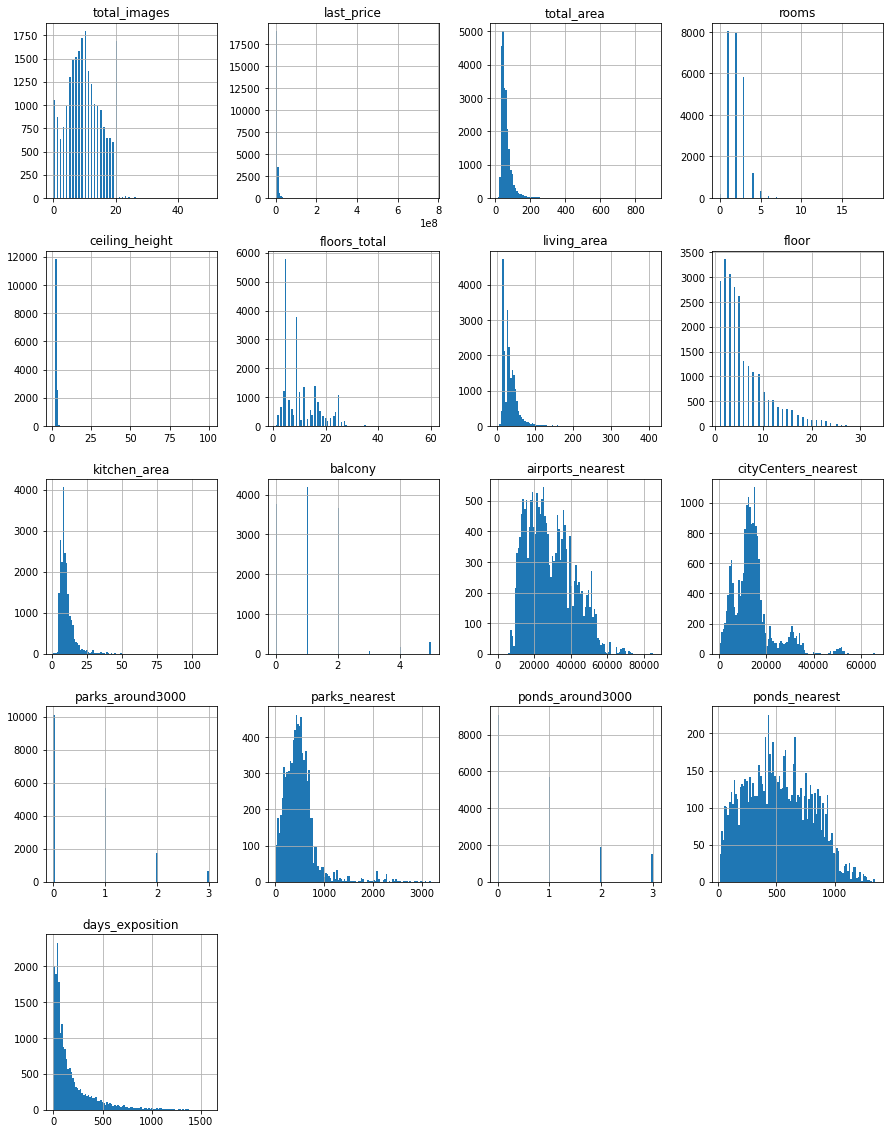

In [4]:
data.hist(figsize=(15, 20), bins=100)

Объявление о продаже квартиры почти всегда содержит меньше 20 фотографий, обычно содержит около 10 фотографий.

По вышеприведённой гистограмме стоимости квартиры сложно сделать какой-либо вывод. Вывод будет сделан далее.

Практически все продаваемые квартиры имеют общую площадь менее 200 кв. м., большая часть из них имеет общую площадью ~50 кв. м.

Чаще всего продаваемые квартиры имеют 1 или 2 комнаты.

Практически все продаваемые квартиры имеют высотку потолков менее 5 м. Более точный вывод будет сделан далее. Часть данных не учтена ввиду отсутствующих значений.

Практически все продаваемые квартиры находятся в домах с числом этажей менее 20. Пики на гистограмме предположительно соответствуют пятиэтажным и девятиэтажным домам. Часть данных не учтена ввиду отсутствующих значений.

Практически все продаваемые квартиры имеют жилую площадь менее 100 кв. м., большая часть из них имеет жилую площадь ~20 кв. м. Часть данных не учтена ввиду отсутствующих значений.

Значительная часть квартир находится на 1-5 этажах, больше всего квартир находится на 2 этаже.

Практически все продаваемые квартиры имеют площадь кухни менее 25 кв. м., большая часть из них имеет площадь кухни ~8 кв. м. Часть данных не учтена ввиду отсутствующих значений.

Большая часть продаваемых квартир имеет 1 балкон. Часть данных не учтена ввиду отсутствующих значений.

Практически все продаваемые квартиры находятся на расстоянии менее 60 км от ближайшего аэропорта, большая часть из них -  на расстоянии ~20 км от аэропорта. Часть данных не учтена ввиду отсутствующих значений.

Практически все продаваемые квартиры находятся на расстоянии менее 20 км от центра города, большая часть из них - на расстоянии ~15 км от центра. Часть данных не учтена ввиду отсутствующих значений.

Значительная доля квартир имеет в радиусе 3 км хотя бы один парк. Часть данных не учтена ввиду отсутствующих значений.

Практически все продаваемые квартиры находятся на расстоянии менее 1 км от ближайшего парка, большая часть из них - на расстоянии ~500 м от парка. Часть данных не учтена ввиду отсутствующих значений.

Значительная доля квартир имеет в радиусе 3 км хотя бы один водоём. Часть данных не учтена ввиду отсутствующих значений.

Практически все продаваемые квартиры находятся на расстоянии менее 1 км от ближайшего водоёма, большая часть из них - на расстоянии ~500 м от водоёма. Часть данных не учтена ввиду отсутствующих значений.

Практически все объявления о продаже квартир были выставлены в течение менее 500 дней, большая часть из них - в течение ~50 дней. Часть данных не учтена ввиду отсутствующих значений.

### Предобработка данных

#### Анализ пропущенных значений

Определим число пропущенных значений в каждом столбце:

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Логическую замену можно провести для следующих столбцов:
- апартаменты или нет,
- число балконов.

Если не указано, апартаменты это или нет, можно считать, что это не апартаменты.
Если число балкнонов не указано, можно считать, что балконов нет.

Проведём возможные замены:

In [6]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
data.loc[data['balcony'].isna(), 'balcony'] = 0

Проверим, что в вышеуказанных столбцах нет пропущенных значений:

In [7]:
data[['is_apartment', 'balcony']].isna().sum()

is_apartment    0
balcony         0
dtype: int64

Подумаем о возможных причины пропусков в данных. Во-первых, пользователь может не указывать все данные о квартире. Это можно исправить, сделав все поля в форме, в которой указываются данные о квартире, обязательными для заполнения. Во-вторых, в случае картографических данных могут быть ошибки при выгрузке этих данных из какой-либо АС или БД. В-третьих, данных может не быть в некоторых случаях, например, если рядом с домом нет парков или водоёмов, то расстоние до ближайшего парка или водоёма не будет указано.

#### Анализ типов данных

Преобразуем типы данных в некоторых столбцах на подходящие:

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].convert_dtypes() # метод astype('int', errors='ignore') в случае отсутствующих значений не меняет тип
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].convert_dtypes()
data['ponds_around3000'] = data['ponds_around3000'].convert_dtypes()

Снова посмотрим на типы данных:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Сейчас типы данных соответствуют желаемым. Изменение типов данных необходимо проводить для удобства работы с данными.

#### Анализ уникальных значений

Посмотрим на уникальные значения в столбце `locality_name`:

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
data['locality_name'].value_counts(dropna=False).sort_index()

Бокситогорск                                                  16
Волосово                                                      36
Волхов                                                       111
Всеволожск                                                   398
Выборг                                                       237
Высоцк                                                         4
Гатчина                                                      307
Зеленогорск                                                   24
Ивангород                                                     28
Каменногорск                                                  13
Кингисепп                                                    104
Кириши                                                       125
Кировск                                                       84
Колпино                                                      338
Коммунар                                                      89
Красное Село             

Сразу бросается в глаза наличие похожих слов 'поселок' и 'посёлок'. Заменим 'поселок' на 'посёлок':

In [12]:
locality_names = data.loc[~data['locality_name'].isna(), 'locality_name']

for i in locality_names.index:
    locality_name = locality_names[i]
    locality_name = locality_name.replace('поселок', 'посёлок')
    locality_names[i] = locality_name

data['locality_name'] = locality_names

После вышеуказанной замены проведём другие замены:

In [13]:
for i in locality_names.index:
    locality_name = locality_names[i]
    locality_name = locality_name.replace('посёлок при железнодорожной станции', 'посёлок')
    locality_name = locality_name.replace('посёлок станции', 'посёлок')
    locality_name = locality_name.replace('городской посёлок', 'посёлок')
    locality_name = locality_name.replace('посёлок городского типа', 'посёлок')
    locality_name = locality_name.replace('коттеджный посёлок', 'посёлок')
    locality_names[i] = locality_name

data['locality_name'] = locality_names

Ещё раз посмотрим на уникальные значения в столбце `locality_name`:

In [14]:
data['locality_name'].value_counts(dropna=False).sort_index()

Бокситогорск                                                  16
Волосово                                                      36
Волхов                                                       111
Всеволожск                                                   398
Выборг                                                       237
Высоцк                                                         4
Гатчина                                                      307
Зеленогорск                                                   24
Ивангород                                                     28
Каменногорск                                                  13
Кингисепп                                                    104
Кириши                                                       125
Кировск                                                       84
Колпино                                                      338
Коммунар                                                      89
Красное Село             

В столбце `locality_name` не осталось неявных дубликатов.

#### Анализ редких и выбивающихся значений

Оценим значения в столбцах:

In [15]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Отметим начальное число строк в датасете:

In [16]:
initial_lines_number = data.shape[0]

Рассмотрим данные о квартирах с высотой потолков более 10 м:

In [17]:
data[data['ceiling_height'] >= 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,<NA>,NaN,<NA>,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,8.0,0,Волхов,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,NaN,2,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,9.0,2,деревня Мины,NaN,NaN,<NA>,NaN,<NA>,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,...,5.7,0,Кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,...,5.2,0,Санкт-Петербург,11647.0,13581.0,0,NaN,0,NaN,NaN


Уберём из датасета квартиры с высотой потолков от 10 м до 20 м, т.к. непонятно, что делать с такой высотой. У квартир, высота потолков в которых превышает 20 м, уменьшим высоту в 10 раз, т.к. есть подозрение, что пользователи не поставили разделитель целой и дробной части, когда указывали высоту потолков.

In [18]:
data = data[(data['ceiling_height'] <= 10) | (data['ceiling_height'] >= 20) | data['ceiling_height'].isna()]
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

Рассмотрим данные о квартирах с высотой потолков менее 2,4 м:

In [19]:
data[data['ceiling_height'] < 2.4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
227,13,2200000.0,47.00,2018-01-12,3,2.34,5,NaN,1,False,...,NaN,0,посёлок Новый Свет,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0
552,11,2999000.0,33.50,2017-03-30,1,2.00,15,17.500000,6,False,...,6.50,0,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270.0
1582,4,4100000.0,45.60,2016-01-13,2,2.30,9,28.400000,8,False,...,7.00,2,Санкт-Петербург,49152.0,14977.0,1,489.0,1,525.0,329.0
2572,4,2400000.0,62.00,2018-12-27,3,2.00,5,40.000000,4,False,...,6.00,1,Луга,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18,1,2.00,18,16.600000,9,False,...,8.80,2,Тосно,NaN,NaN,<NA>,NaN,<NA>,NaN,36.0
5498,17,2200000.0,56.00,2018-04-02,2,2.30,5,45.000000,1,False,...,9.00,2,Сясьстрой,NaN,NaN,<NA>,NaN,<NA>,NaN,55.0
5712,5,1500000.0,42.80,2017-08-14,2,1.20,2,27.500000,1,False,...,5.20,0,посёлок Мга,NaN,NaN,<NA>,NaN,<NA>,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29,1,2.00,5,NaN,5,False,...,NaN,0,Луга,NaN,NaN,<NA>,NaN,<NA>,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18,1,2.00,17,15.200000,12,False,...,10.10,0,посёлок Металлострой,25268.0,26980.0,0,NaN,0,NaN,53.0
12755,2,1400000.0,22.50,2017-09-21,1,2.20,2,18.000000,2,False,...,4.50,1,село Копорье,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0


Исключим такие квартиры из рассмотрения как квартиры с неправдоподобно низкими потолками:

In [20]:
data = data[(data['ceiling_height'] >= 2.4) | data['ceiling_height'].isna()]

Рассмотрим данные о квартирах с небольшим расстоянием до аэропорта:

In [21]:
data[data['airports_nearest'] < 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0


Исключим такую квартиру из рассмотрения, потому что расстояние до аэропорта не может быть равно 0:

In [22]:
data = data[(data['airports_nearest'] > 0) | data['airports_nearest'].isna()]

Рассмотрим данные о квартирах с числом комнат, равным 0:

In [23]:
data[data['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24,15.50,2,False,...,NaN,2,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.00,1,False,...,NaN,0,деревня Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17,24.75,4,False,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.30,19,False,...,NaN,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10,NaN,7,False,...,NaN,0,посёлок Шушары,NaN,NaN,<NA>,NaN,<NA>,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25,17.50,21,False,...,NaN,0,деревня Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9,12.00,1,False,...,NaN,0,посёлок Шушары,18654.0,29846.0,0,NaN,0,NaN,40.0
780,9,2600000.0,26.10,2018-02-20,0,NaN,18,NaN,8,False,...,NaN,1,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0
839,14,1900000.0,35.00,2017-04-14,0,2.70,5,15.00,3,False,...,NaN,1,посёлок Новый Свет,NaN,NaN,<NA>,NaN,<NA>,NaN,7.0
946,5,2200000.0,23.00,2016-09-27,0,NaN,27,18.00,7,False,...,NaN,2,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,483.0


Исключим такие квартиры из рассмотрения, потому что число комнат не может быть равным 0:

In [24]:
data = data[(data['rooms'] > 0) | data['rooms'].isna()]

Посмотрим, какая доля от начального числа строк осталась в датасете:

In [25]:
data.shape[0] / initial_lines_number

0.9905903202666779

В результате фильтрации ушло менее 1 % от начального числа строк. Можно продолжать анализ.

### Добавление в таблицу новых столбцов

Добавим в датасет новые столбцы:

In [26]:
data['square_meter_price'] = data['last_price'] / data['total_area'] # цена квадратного метра
data['week_day_exposition'] = data['first_day_exposition'].dt.dayofweek # день недели публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month # месяц публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year # год публикации объявления

# функция для расчёта типа этажа квартиры
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_type'] = data[(~data['floor'].isna()) & (~data['floors_total'].isna())].apply(floor_type, axis=1) # тип этажа квартиры
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0) # расстояние до центра города в километрах

Посмотрим на новые столбцы:

In [27]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Исследовательский анализ данных

#### Анализ некоторых параметров объектов

Изучим некоторые характеристики объектов.

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

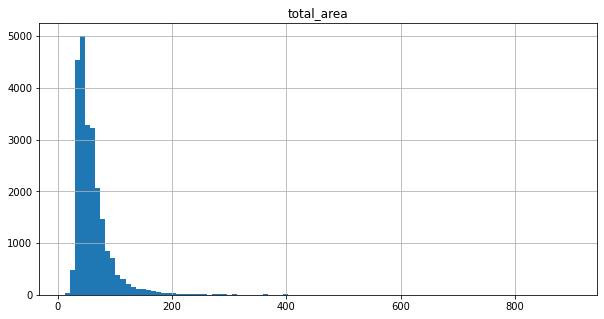

In [28]:
data.hist(column='total_area', figsize=(10, 5), bins=100)

Практически все продаваемые квартиры имеют общую площадь до 200 кв. м. Наиболее распространенные из них - квартиры площадью 40-50 кв. м.

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

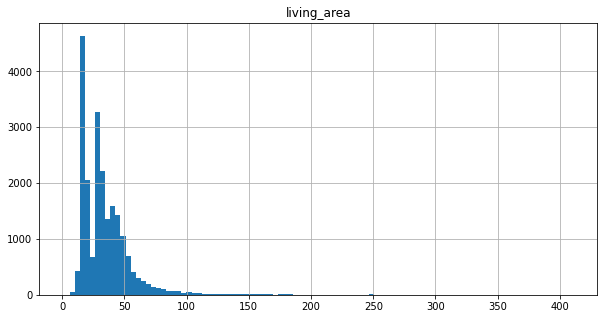

In [29]:
data.hist(column='living_area', figsize=(10, 5), bins=100)

Практически все продаваемые квартиры имеют жилую площадь до 100 кв. м. Наиболее распространенные из них - квартиры с жилой площадью ~18 кв. м.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

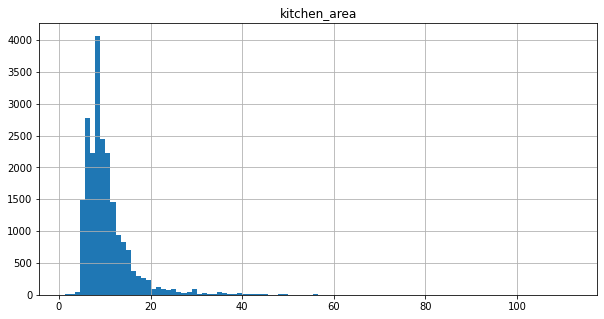

In [30]:
data.hist(column='kitchen_area', figsize=(10, 5), bins=100)

Практически все продаваемые квартиры имеют площадь кухни до 20 кв. м. Наиболее распространенные из них - квартиры с площадью кухни 6-10 кв. м.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

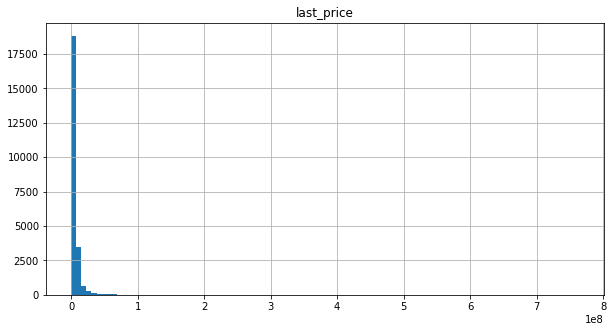

In [31]:
data.hist(column='last_price', figsize=(10, 5), bins=100)

Практически все продаваемые квартиры имеют стоимость до 20 млн. р. Наиболее распространенные из них - квартиры стоимостью ~4 млн. р.

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

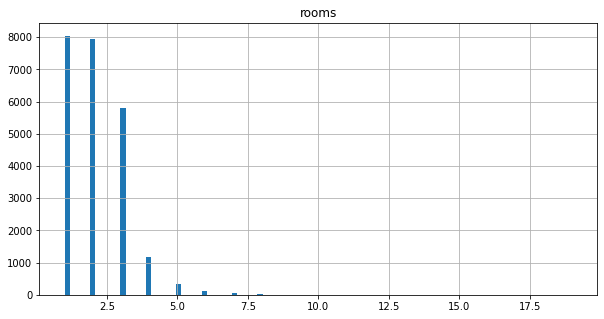

In [32]:
data.hist(column='rooms', figsize=(10, 5), bins=100)

Практически все продаваемые квартиры имеют число комнат меньше 4. Наиболее распространенные из них - одно- и двухкомнатные квартиры.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

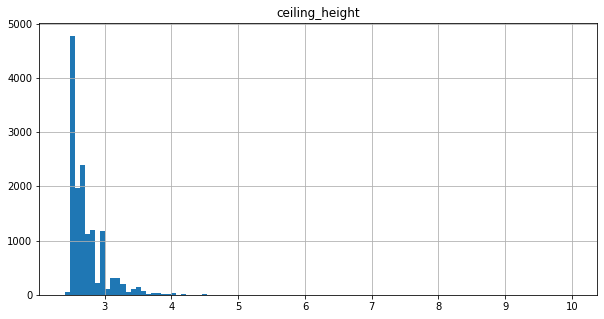

In [33]:
data.hist(column='ceiling_height', figsize=(10, 5), bins=100)

Практически все продаваемые квартиры имеют высоту потолков менее 3 м. Наиболее распространенные из них - квартиры с высотой потолков 2,5 м.

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

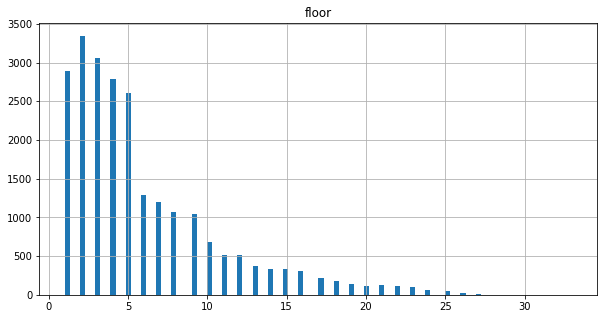

In [34]:
data.hist(column='floor', figsize=(10, 5), bins=100)

Практически все продаваемые квартиры находятся на этаже не выше 15. Наиболее распространенные из них - квартиры на 2 этаже.

<AxesSubplot:title={'center':'floor_type'}>

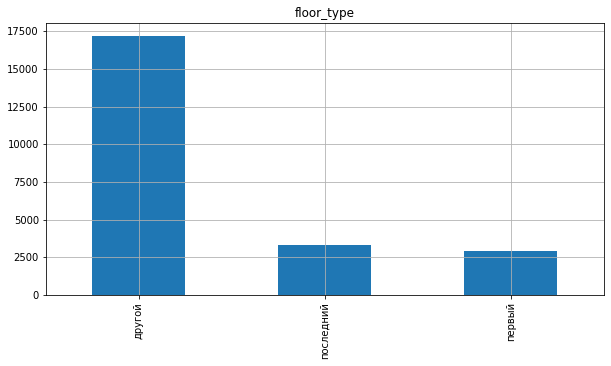

In [35]:
data['floor_type'].value_counts().plot(kind='bar', figsize=(10, 5), title='floor_type', grid=True)

Бо'льшая часть продаваемых квартир находится на этажах, отличных от первого и последнего.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

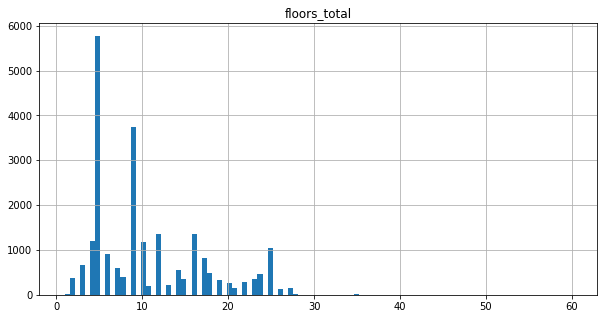

In [36]:
data.hist(column='floors_total', figsize=(10, 5), bins=100)

Значительное число продаваемых квартир находится в пятиэтажных и девятиэтажных домах.

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

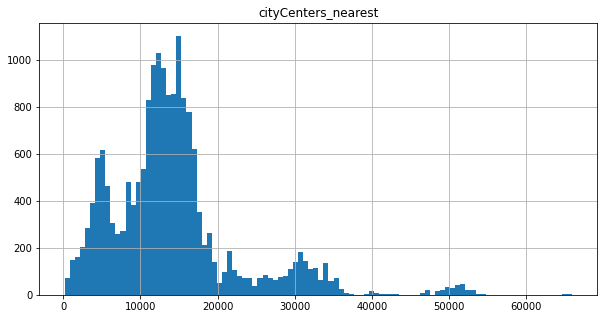

In [37]:
data.hist(column='cityCenters_nearest', figsize=(10, 5), bins=100)

Практически все продаваемые квартиры находятся на расстоянии менее 20 км от центра города. Наиболее распространенные из них - квартиры, находящиеся на расстоянии ~15 км от центра.

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

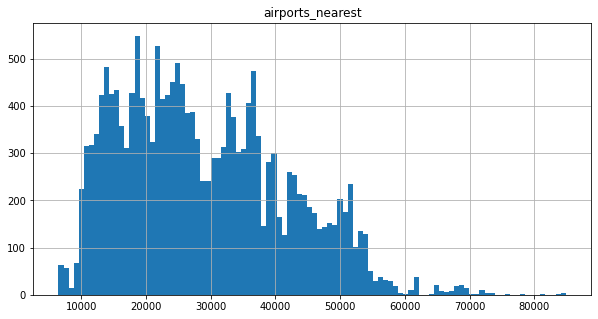

In [38]:
data.hist(column='airports_nearest', figsize=(10, 5), bins=100)

Практически все продаваемые квартиры находятся на расстоянии менее 60 км от ближайшего аэропорта. Наиболее распространенные из них - квартиры, находящиеся на расстоянии ~20 км от аэропорта.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

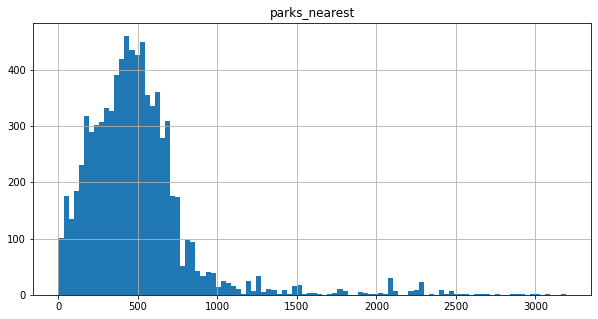

In [39]:
data.hist(column='parks_nearest', figsize=(10, 5), bins=100)

Практически все продаваемые квартиры находятся на расстоянии менее 1 км от ближайшего парка. Наиболее распространенные из них - квартиры, находящиеся на расстоянии ~500 м от парка.

array([[<AxesSubplot:title={'center':'week_day_exposition'}>]],
      dtype=object)

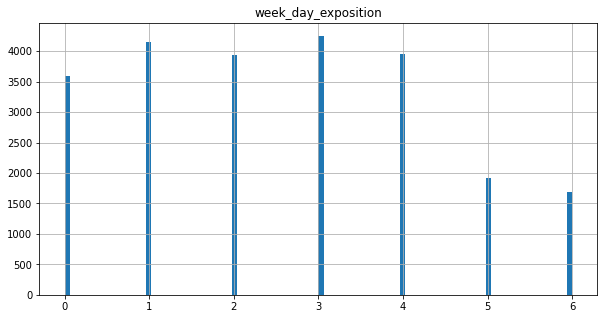

In [40]:
data.hist(column='week_day_exposition', figsize=(10, 5), bins=100)

Бо'льшая часть объявлений о продаже квартир выкладывается во вторник, среду, четверг и пятницу. В понедельник люди 'раскачиваются', а в выходные отдыхают.

array([[<AxesSubplot:title={'center':'month_exposition'}>]], dtype=object)

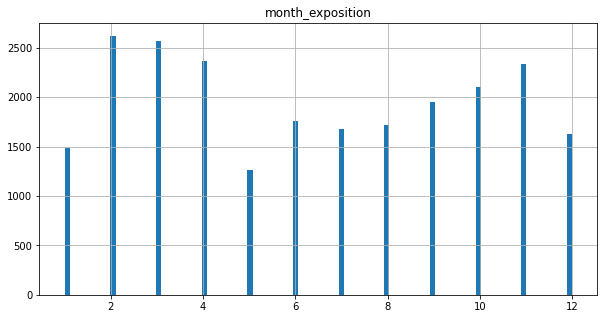

In [41]:
data.hist(column='month_exposition', figsize=(10, 5), bins=100)

В январе выкладывается относительно небольшое число объявлений из-за новогодних праздников. Значительное число объявлений выкладывается в феврале. Такая активность продолжается в марте и апреле. В мае эта активность затихает из-за майских праздников. Незначительный рост активности наблюдается летом. Ближе к новому году выкладывается всё больше объявлений, видимо из-за того, что многие не хотят переносить продажу квартиры на следующий год. В декабре активность снова падает из-за приготовлений к новогодним праздникам.

#### Анализ времени продажи квартир

Посмотрим на гистрограмму времени нахождения объявления в активном состоянии:

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

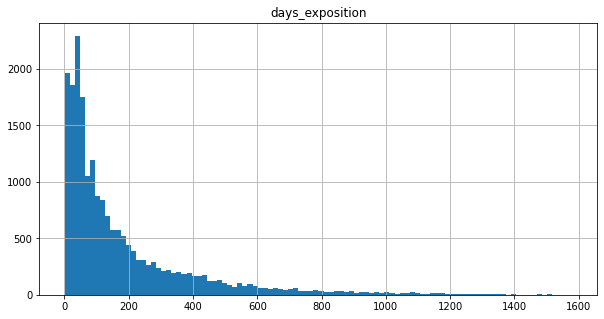

In [42]:
data.hist(column='days_exposition', figsize=(10, 5), bins=100)

Посмотрим ещё раз на статистику по столбцу `days_exposition`:

In [43]:
data['days_exposition'].describe()

count    20313.000000
mean       181.596367
std        220.178584
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее число дней, в течение которых продавалась квартира - 182. Медиана числа дней, в течение которых продавалась квартира - 96. Обычно продажа квартиры занимает около 100 дней. Быстрыми продажами можно считать продажи, которые заняли менее 45 дней. Долгими продажами можно считать продажи, которые заняли более 232 дней.

#### Анализ факторов, влияющих на стоимость квартиры

Посмотрим на зависимость стоимости квартиры от общей площади:

0.6531078862580413

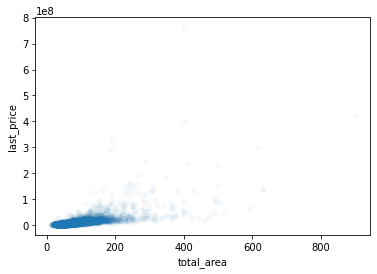

In [44]:
data.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter', alpha=0.03)
data['total_area'].corr(data['last_price'])

Посмотрим на зависимость стоимости квартиры от жилой площади:

0.5660673174413244

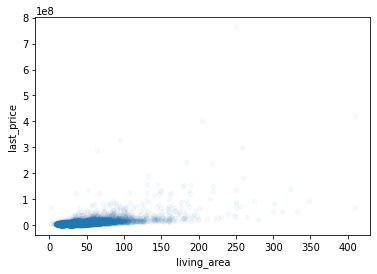

In [45]:
data.sort_values('living_area').plot(x='living_area', y='last_price', kind='scatter', alpha=0.03)
data['living_area'].corr(data['last_price'])

Посмотрим на зависимость стоимости квартиры от площади кухни:

0.5198142326470816

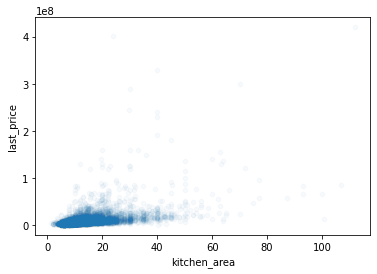

In [46]:
data.sort_values('kitchen_area').plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03)
data['kitchen_area'].corr(data['last_price'])

Посмотрим на зависимость стоимости квартиры от числа комнат:

0.3647927846988725

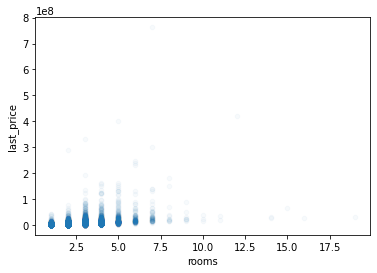

In [47]:
data.sort_values('rooms').plot(x='rooms', y='last_price', kind='scatter', alpha=0.03)
data['rooms'].corr(data['last_price'])

Посмотрим на зависимость стоимости квартиры от типа этажа:

<AxesSubplot:title={'center':'floor_type'}, xlabel='floor_type'>

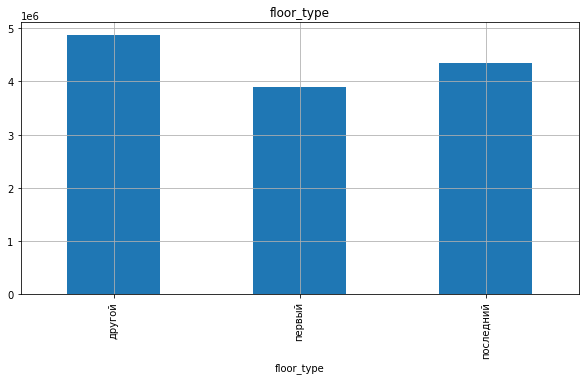

In [48]:
data.groupby(by='floor_type')['last_price'].median().plot(kind='bar', figsize=(10, 5), title='floor_type', grid=True)

Посмотрим на зависимость стоимости квартиры от дня недели выкладки объявления:

<AxesSubplot:title={'center':'last_price'}, xlabel='week_day_exposition'>

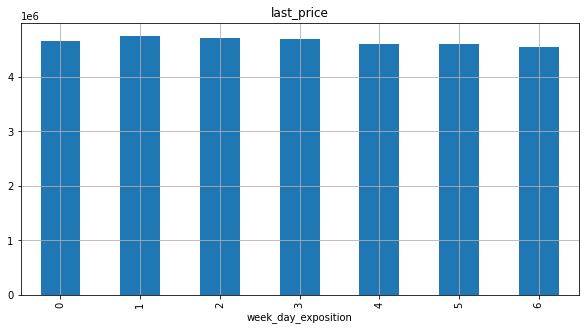

In [49]:
data.groupby(by='week_day_exposition')['last_price'].median().plot(kind='bar', figsize=(10, 5), title='last_price', grid=True)

Посмотрим на зависимость стоимости квартиры от месяца выкладки объявления:

<AxesSubplot:title={'center':'last_price'}, xlabel='month_exposition'>

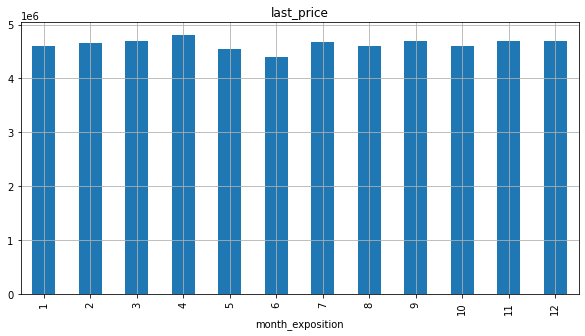

In [50]:
data.groupby(by='month_exposition')['last_price'].median().plot(kind='bar', figsize=(10, 5), title='last_price', grid=True)

Посмотрим на зависимость стоимости квартиры от года выкладки объявления:

<AxesSubplot:title={'center':'last_price'}, xlabel='year_exposition'>

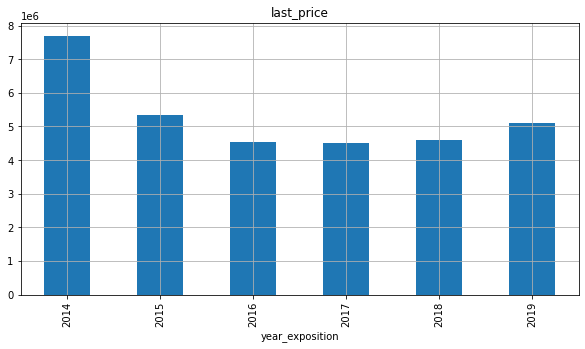

In [51]:
data.groupby(by='year_exposition')['last_price'].median().plot(kind='bar', figsize=(10, 5), title='last_price', grid=True)

На стоимость квартиры больше всего влияет общая площадь. В меньшей степени на стоимость влияют жилая площадь, площадь кухни и число комнат. Чем больше эти характеристики, тем дороже квартира. Тип этажа также влияет на стоимость: квартиры на первом этаже заметно дешевле. День недели и месяц выкладки объявления практически не влияют на стоимость квартиры. В период 2014-2016 гг. стоимость квартир значительно упала (более чем в 1,5 раза), далее оставалась примерно на одном уровне.

#### Анализ цены квадратного метра

In [52]:
pd.set_option('display.max_rows', 10)

Рассчитаем среднюю цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [53]:
locality_names = data.groupby(by='locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
sample = data[data['locality_name'].isin(locality_names.index)]
sample['square_meter_price'].mean()

108998.29295880004

Найдём среднюю цену квадратного метра в населённых пунктах:

In [54]:
data.groupby(by='locality_name')['square_meter_price'].mean().sort_values(ascending=False)

locality_name
Зеленогорск             115122.799198
Санкт-Петербург         114790.514105
посёлок Репино          104238.614786
Пушкин                  103125.819291
Сестрорецк              101757.616875
                            ...      
посёлок Совхозный        12629.129129
деревня Выскатка         12335.480902
деревня Вахнова Кара     11688.311688
посёлок Свирь            11481.481481
деревня Старополье       11206.221198
Name: square_meter_price, Length: 316, dtype: float64

Самая высокая стоимость квадратного метра в Зеленогорске. Самая низкая - в деревне Старополье.

#### Анализ цены единицы расстояния до центра города в Санкт-Петербурге

Рассчитаем среднюю цену километра расстояния до центра города в Санкт-Петербурге:

In [55]:
sample = data[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest_km'] != 0)]
average_prices_per_kilometer = sample['last_price'] / sample['cityCenters_nearest_km']
average_prices_per_kilometer.mean()

1377109.8446161116

Для наглядности построим график типа bar, сгруппировав значения по километрам и усреднив цены.

<AxesSubplot:title={'center':'last_price'}, xlabel='cityCenters_nearest_km'>

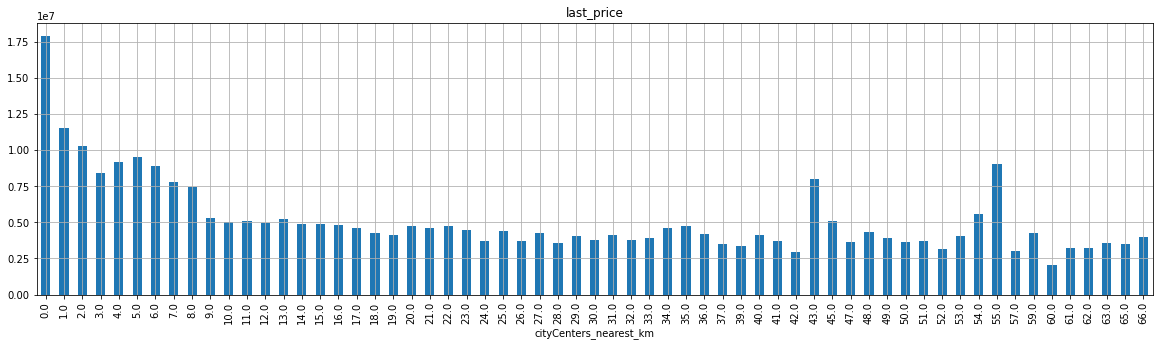

In [56]:
data.groupby(by='cityCenters_nearest_km')['last_price'].median().plot(kind='bar', figsize=(20, 5), title='last_price', grid=True)

На расстоянии 0-10 км стоимость квартир в среднем падает в 2 раза с удалением от центра. После 10 км падение цены незначительно. Наблюдаются выбросы в районе 43 км и 55 км. Одна из возможных причин выбросов - наличие элитной недвижимости на этом расстоянии.

### Общий вывод

В ходе работы проанализированы данные о продаже квартир в Санкт-Петербурге и соседних населённых пунктах в период 2014-2019 гг. Перед анализом проведена очистка данных: устранены некоторые пропущенные значения и неявные дубликаты, удалены записи с выбросами.

Характеристики квартир, объявления о продаже которых выкладывались чаще всего:
- общая площадь 40-50 кв. м,
- жилая площадь ~18 кв. м,
- площадь кухни 6-10 кв. м,
- стоимость ~4 млн. р,
- число комнат 1-2,
- высота потолков 2,5 м,
- 2-ой этаж,
- число этажей в доме 5 или 9,
- расстояние до центра города ~15 км,
- расстояние до ближайщего аэропорта ~20 км,
- расстояние до ближайщего парка ~500 м,
- день выкладки объявления - вторник, среда, четверг, пятница,
- месяц выкладки объявления - февраль.

Среднее число дней, в течение которых продавалась квартира - 182. Медиана числа дней, в течение которых продавалась квартира - 96. Обычно продажа квартиры занимает около 100 дней. Быстрыми продажами можно считать продажи, которые заняли менее 45 дней. Долгими продажами можно считать продажи, которые заняли более 232 дней.

На стоимость квартиры больше всего влияет общая площадь. В меньшей степени на стоимость влияют жилая площадь, площадь кухни и число комнат. Чем больше эти характеристики, тем дороже квартира. Тип этажа также влияет на стоимость: квартиры на первом этаже заметно дешевле. День недели и месяц выкладки объявления практически не влияют на стоимость квартиры. В период 2014-2016 гг. стоимость квартир значительно упала (более чем в 1,5 раза), далее оставалась примерно на одном уровне.

Цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений - 108 998 р.

Самая высокая стоимость квадратного метра в Зеленогорске. Самая низкая - в деревне Старополье.

Средняя цена километра расстояния до центра города в Санкт-Петербурге - 1 377 110 р.

На расстоянии 0-10 км стоимость квартир в среднем падает в 2 раза с удалением от центра. После 10 км падение цены незначительно. Наблюдаются выбросы в районе 43 км и 55 км. Одна из возможных причин выбросов - наличие элитной недвижимости на этом расстоянии.